# 排队论模型

排队论是我们每个人都很熟悉的现象。因为人或物或是信息为了得到某种服务必须排队。
- 有一类排队是有形的，例如在售票处等待买票的排队，加油站前汽车等待加油的排队等；
- 还有一类排队是无形的，例如电话交换机接到的电话呼叫信号的排队，等待计算机中心处理机处理的信息的排队等。

为了叙述的方便，**排队者**无论是人、物、或信息，以后**统称为“顾客”**。**服务者**无论是人，或事物， 例如一台电子计算机也可以是排队系统中的服务者，我们以后**统称为“服务员”**。



![Image Name](https://cdn.kesci.com/upload/image/q768d7cnmr.jpg?imageView2/0/w/960/h/960)


排队论是研究排队系统在不同的条件下（最主要的是顾客到达的随机规律和服务时间的随机规律）产生的排队现象的随机规律性。也就是要建立反映这种随机性的数学模型。研究的最终目的是为了运用这些规律，对实际的排队系统的设计与运行做出最优的决策。 




排队论中的数学模型是根据概率和随机过程的理论建立起来的，我们先来讨论泊松过程，然后在此基础上研究排队系统的结构及其主要的数学模型，最后研究排队系统的优化问题。 


## 泊松分布 

### 二项分布和泊松分布



```{admonition} 二项分布引入
如果一个牛仔一枪打中靶子的概率是$p$,如果我们让他开十枪，如果每次击中一次目标就能获得一分，问他一共能获得几分？

![Image Name](https://cdn.kesci.com/upload/image/q768iziig6.jpg?imageView2/0/w/960/h/960)


```

虽然我们不能在牛仔射击前准确地预测得出具体的分数$k$，但是可以求出$k$的概率分布，比如得九分的情况对应于：射失一发。根据组合数性质，它的概率是

$$
P(k=9) = C_{10}^{9}p^9(1-p)
$$

同理，得$k$分的概率就是

$$
P(k) = C_{n}^{k}p^k(1-p)^{n-k}
$$

对于一个神枪手（$p=1$）来说，他得十分的概率就是1.

```{tip}
二项分布和泊松分布的不同在于，前者研究的对象是$n$个离散的对象(10次射击)，而后者考察的是一段连续的时间。因为泊松分布就是在二项分布的基础上化离散为连续。
```



我们把单位时间划分为$n$个细小的时间片，假设在每个时间片内牛仔都在射击，击中的概率为$p$，只不过这次他发射的不是子弹，而是顾客。 “命中目标”就代表向服务台成功发射一名顾客，如果没有命中就表示顾客没能成功来到。单位时间内平均顾客的到达速度可以表示为

$$
\lambda = np
$$


```{tip}
如果$n$不是无穷大，那么会出现某个时间片内出现两个顾客同时进入系统的情况，这样的话就和我们的假设【每个时间片内只能出现一个顾客或者不出现】不同了。所以$n$必须趋向无穷。 这也是为什么泊松分布的前提是$n$很大了（另一个前提是$p$很小）。
```


这样一来我们就能用二项分布的公式来表示单位时间内到来$k$个顾客的概率了。在单位时间，我们执行$n$次独立的“发射试验”，把顾客发射到系统的概率是$p$，那么单位时间到来$k$个顾客的概率就是

$$
P(k) = C_{n}^{k}p^k(1-p)^{n-k}
$$

把这个组合数展开

$$
P(k)=\frac{n(n-1) \dots(n-k+1)}{k !} p^{k}(1-p)^{n-k}
$$

上下同乘$(1-p)^{k}$

$$
P(k)=\frac{n(n-1) \ldots(n-k+1)}{k !} \frac{p^{k}(1-p)^{n}}{(1-p)^{k}}
$$

把$p^k$拆成$k$个$p$连乘的形式放在左边分子上，


$$
P(k)=\frac{n p(n p-p) \ldots(n p-k p+p)}{k !} \frac{(1-p)^{n}}{(1-p)^{k}}
$$
调整$(1-p)^n$,因为$p \to 0$ , 所以

$$
(1-p)^{-\frac{1}{p}} \rightarrow e
$$

$$
P(k)=\frac{n p(n p) \ldots(n p)}{k !} \frac{e^{-n p}}{(1)^{k}}
$$

令$np=\lambda$,那么我们有

$$
P(k)=\frac{\lambda^{k}}{k !} e^{-\lambda}
$$

这就是我们熟悉的泊松分布公式，其中$\lambda$的物理意义就是单位时间内顾客到达的数量，也就是平均到达率，是一个常数。

### 泊松分布案例

我们知道，在日常生活中，大量时间是有规律可循的，例如

- 某医院平均每小时出生3个婴儿
- 某公司平均每10分钟接到一个电话
- 某超市平均每天销售4包A品牌奶粉
- 某网站平均每分钟有2次访问

它们的特点就是，我们可以预估这些事件发生的总数，但是没法具体知道具体的发生时间。比如我们提出这样的一问题：**已知医院平均每小时出生3个婴儿，请问下一个小时，会出生几个？**



有可能一下子出生6个，也要可能一个都没有。尽管我们不能做出明确的预测，但是从概率意义上，我们能够对他们的发生概率进行描述。


在本例中，到达速度$\lambda = 3$，我们来看下下个小时出生0个婴儿的概率

$$
P(0) = \frac{3^0}{0!}e^{-3} = 4.98\%
$$

在接下来的一个小时中，至少出生两个婴儿的概率

$$
\begin{aligned}P(k\geq2) &=1-P(k=1)-P(k=0)\\& =  1- \frac{3^1}{1!}e^{-3} - \frac{3^0}{0!}e^{-3}\\& = 1 - 4e^{-3}\\&=80.09\%\end{aligned}
$$

我们还可以看下泊松分布的图像。

<BarContainer object of 12 artists>

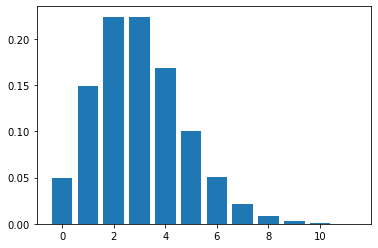

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
Lambda = 3
k = [i for i in range(12)]
pk = []
for kk in k:
    pk.append(Lambda ** kk / np.math.factorial(kk) * np.exp(-Lambda))
plt.bar(k,pk)    

```{admonition} 思考
- 泊松分布峰值表示的是什么意思？
- 在这个案例中，为什么会出现$n=2$和$n=3$两个最大概率？

```

### 指数分布

我们在排队论中，经常见到的另一个分布较指数分布。指数分布可以从泊松分布推导出来，我们来看下面的例子。

我们设$X$为前后两次婴儿出生的间隔时间，显然$X$也是随机变量。 

以上次婴儿出生的时刻为0时刻，$[0,t]$时间段内不发生新出生的概率可以用泊松分布来衡量，这时候单位时间不再是1了，而是$t$，也就是$\lambda t = np$

$$
P(X>t) = P(k=0) = e^{-\lambda t}
$$


反过来，在时间间隔$[0,t]$内发生事件的概率，就是1减去上面的值：

$$
P(X \leq t) = 1- e^{-\lambda t}
$$


根据概率论知识，我们知道，分布函数是概率密度函数从负无穷到正无穷上的积分。对上述的分布函数进行求导，得到

$$
f(t) = \lambda e^{-\lambda t}
$$

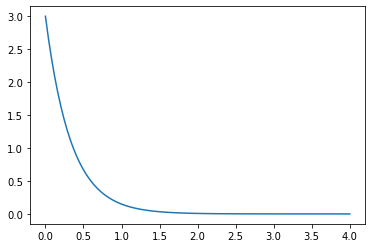

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
Lambda = 3
t = np.linspace(0,4,100)
pk = []
for tt in t:
    pk.append(Lambda*np.exp(-Lambda * tt))
plt.plot(t,pk)    

### 关于泊松分布和指数分布的关系


在一个**满足马尔科夫过程**的排队系统中，随机变量$X$（单位时间内顾客到达数），满足泊松分布：$X \sim P(X)$，概率分布函数为

$$
P(x=k)=\frac{\lambda^{k}}{k !} e^{-\lambda}
$$

注意：泊松分布中的$\lambda$，表征的是单位时间内平均到达的顾客数。



在一个**满足马尔科夫过程**的排队系统中，随机变量$T$（顾客相继到达时间间隔），满足负指数分布，


$$
T \sim f(t)=\lambda e^{-\lambda t}
$$

注意：负指数分布中的$\lambda$，表征也的是单位时间内平均到达的顾客数。有时候，为了方便起见，我们常常做如下变换

$$
\mu = \frac{1}{\lambda} 
$$

$$
T \sim f(t)=\frac{1}{\mu}  e^{-\frac{1}{\mu} t}
$$


我们可以这么理解：**泊松分布和负指数分布，是从两个角度，对同一个现象进行的描述。**

- 泊松分布关注的是单位时间内到达（或者离去）的顾客个数
- 负指数分布关注的是顾客到达（或者离去）的时间间隔

实际上，对于计算机模拟来说，后者更直观。我们来看一下程序实现。

Text(0.5, 0, 'Time')

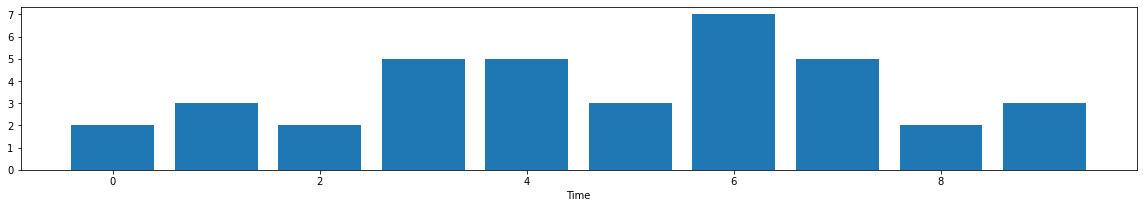

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,3))
x1 = np.random.poisson(lam=3, size=10)
plt.bar(range(len(x1)),x1)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

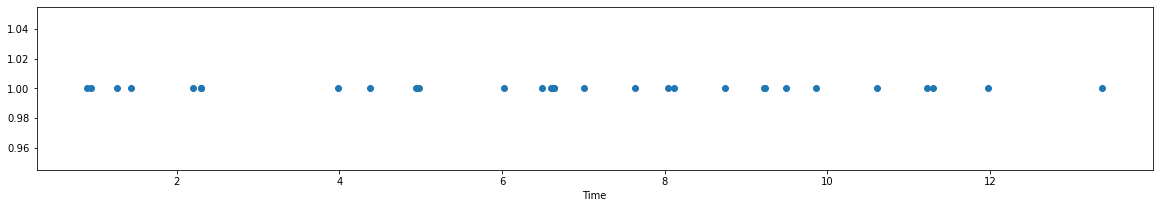

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

lambda1 = 3
size = 30
t1 = np.random.exponential(1/lambda1, size=size)

cumulativeTime = [t1[0]]
for time in t1[1:]:
    cumulativeTime.append(cumulativeTime[-1]+time)
plt.figure(figsize=(20,3))
plt.scatter(cumulativeTime,[1]*len(cumulativeTime))
plt.xlabel('Time')

## 排队系统的数学模型

尽管排队系统是多种多样的，但所有的排队系统都是由**输入过程、排队规则、服务规则**三个基本部分组成。

![Image Name](https://cdn.kesci.com/upload/image/q2yb3b8s60.png?imageView2/0/w/500/h/500)

### 输入过程

输入过程是描述顾客来源以及顾客到达排队系统的规律。一般从以下几个方面对输入过程进行描述：
- 顾客源中顾客的数量是有限还是无限；
- 顾客到达的方式是单个还是成批；
- 顾客的到达**是否相互独立**（以前到达的顾客对以后顾客的到达没有影响，则称顾客的到达是相互独立的，否则就是相互关联的）；
- 顾客相继到达的**间隔时间分布是确定型的还是随机型的**（如果是随机分布，就需要指导单位时间内的顾客到达数或者顾客相继到达时间间隔的概率分布）；
- 输入的过程是平稳的还是非平稳的（若相继到达的时间间隔分布参数（如均值、方差）都是和时间无关的，则称输入过程是平稳的，否则是非平稳的）。

**在下面的讨论中，我们都假设顾客的到达是相互独立的，输入过程是平稳的。**

### 服务机构及服务规则

指服务机构服务设施的个数、排列方式及服务方式，一般从一下几个方面进行描述：

- **服务台（员）的个数** ：服务机构可以有一个或者多个服务台
- **服务台的情况** ：单队伍-单服务台、单队伍-多服务台、多队伍-多服务台、串联多服务台以及混合多服务台等多种形式；
- **服务台的服务方式** ：对顾客是单个服务还是成批服务，本课程我们只考虑单个服务的情况
- **服务时间**：同输入过程一样，对顾客的服务时间也分为确定型的还是随机型的，如果是随机分布，需要知道单位时间内服务的顾客数或者是顾客顾客相继服务的时间间隔的概率分布。
- 在排队论中，*一般假设顾客相继到达的时间间隔和服务时间至少有一个是随机的*。


服务员对顾客服务过程，服务机构可以是一个服务员或多个服务员的。对顾客可以单独进行服务，也可以对成批顾客进行服务，**在我们这里仅介绍对顾客单独进行服务。**

设$C$为服务机构服务员个数，当$C=1$时，为单服务系统，当$C \geq 2$，为多服务系统。

和输入过程一样，服务时间都是随机的，且我们假设，设$\xi_n$表示服务员为$n$个顾客提供服务所需的时间，$\xi$的概率分布是已知的可以根据原始资料判断得到的，主要有的分布为负指数分布(定长分布，一般独立分布等).

### 排队与服务规则

顾客排队和等待的规则，排队规则一般有**等待制，损失制和混合制**。

 - 所谓等待制就是当一个顾客到达时，若所有服务台均被占用时，该顾客便排队等待服务，服务台按照下面的规则对顾客进行服务：
	 1. 先到先服务（FCFS）
	 2. 后到先服务（FCLS）
	 3. 随机服务（SIRO）
	 4. 有优先权的服务（PR）。

 - 损失制也称即时制(系统容量$D=C$)就是服务台被占用时顾客便即时离去，永不再来。

 - 混合制是等待制和损失制系统的结合，一般是指允许排队，但又不允许队列无限长。具体来讲，分为以下三种：
	1. 队长有限，即等待的空间是有限的
	2. 等待时间有限，即顾客在系统中的等待时间不超过某一给定值$T$，当等待时间超过$T$时，顾客自动离去，不再回来
	3. 逗留时间有限（等待时间和服务时间之和）

### 排队模型的符号表示:kendall符号

一般表示法 $A/B/C/D/E/F$
- $A$:顾客来到时间间隔的分布类型
- $B$:服务时间的分布类型
- $C$:服务员个数
- $D$:系统容量
- $E$:顾客源个数
- $F$:服务规则(如先到先服务$FCFS$,后到先服务$FCLS$)



例"$M/M/1/k/\infty/FCFS$"表示顾客到达间隔时间和服务时间均服从负指数分布，一个服务台，系统至多容纳$k$个顾客,潜在的顾客数不限，先来先服务的排队系统。

有时候，我们略去后三项，得到先来先服务的等待排队模型的三参数表示法即A/B/C，
 $M/M/c$  顾客到达间隔时间和服务时间均服从负指数分布，$C$个服务台的等待制排队模型。
 $M/G/1$  顾客到达间隔服从负指数分布，服务时间是$G$分布,单个服务台的等待制排队模型。

### 排队系统的主要指标

研究排队问题的目的，是研究排队系统的运行效率估计服务质量，确定系统参数最优值，以决定系统的结构是否合理，设计改进措施等，所以必须确定用来判断系统运行优劣的基本数量指标，这些数量指标通常是

- **队长**:是指系统中顾客(包括排队等待和正在接受服务的)的数目，它的期望值为$L_S$，而排队长度仅指，其期望记为$L_q$

$$
系统中的顾客数(队长) = 等待服务的顾客数+正被服务的顾客数
$$

所以$L_S,L_q$越大，说明服务效率越低。




$$
逗留时间=等待时间+服务时间
$$

- **忙期**:是指服务台连续繁忙的时间，即顾客从到达空闲服务台算起到服务台再次变为空闲时止的这段时间。这是服务台最关心数量指标，它直接关系到服务员工作强度，与忙期相对应的是闲期，这是指服务台连续保持空闲的时间长度；显然，在排队系统中忙期与闲期，是交替出现的。

排队系统除了上述三个主要数量指标外，另外服务台的利用率(即服务员忙碌的时间在总时间中所占比例)、顾客损失率在排队论的研究中也是很重要的指标。 

$$
服务机构的工作强度 = \frac{用于服务顾客的时间}{总时间}
$$

$$
顾客损失率 = \frac{没有得到服务的顾客的个数}{总顾客数}
$$



### 常用的概率分布

#### 定长分布

定长分布简单来说就是，每一个顾客的服务时间都是定值。

#### 均匀分布
在概率论和统计学中，均匀分布也叫矩形分布，它是对称概率分布，在相同长度间隔的分布概率是等可能的。 均匀分布由两个参数$a$和$b$定义，它们是数轴上的最小值和最大值，通常缩写为$U(a,b)$。

$$
f(x)=\begin{cases}
\dfrac{1}{b-a}, a<x<b\\
0 , else
\end{cases}
$$

(0.0, 1.2)

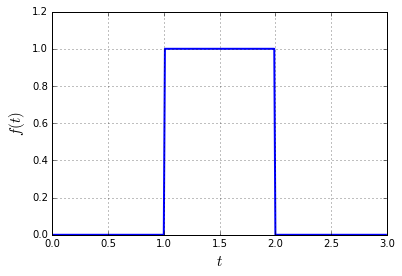

In [5]:
def uniform(x,a,b):
    if (x > a) and (x < b):
        return 1/(b-a)
    else:
        return 0 

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')
%matplotlib inline
a = 1
b = 2
t_list = [0.01 * i for i in range(300)]
ft = [uniform(t,a,b) for t in  t_list]
plt.plot(t_list, ft,linewidth = 2)
plt.xlabel(r'$t$',fontsize = 15)
plt.ylabel(r'$f(t)$',fontsize = 15)
#plt.text(4, 0.6, r'$f(t)=\lambda e^{-\lambda t}, \quad t>0$',fontsize = 20)
plt.grid()
plt.ylim([0,1.2])

#### 正态分布

正态分布（Normal distribution），也称“常态分布”，又名高斯分布（Gaussian distribution），最早由A.棣莫弗在求二项分布的渐近公式中得到。C.F.高斯在研究测量误差时从另一个角度导出了它。P.S.拉普拉斯和高斯研究了它的性质。是一个在数学、物理及工程等领域都非常重要的概率分布，在统计学的许多方面有着重大的影响力。
正态曲线呈钟型，两头低，中间高，左右对称因其曲线呈钟形，因此人们又经常称之为钟形曲线。


$$
f(x)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^{2}}{2 \sigma^{2}}\right)
$$

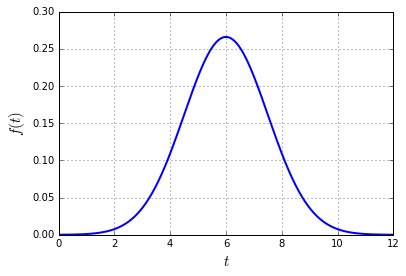

In [6]:
mu = 6
sigma = 1.5
t_list = [0.01 * i for i in range(1200)]
ft = [ 1/np.sqrt(2*np.pi)/sigma * np.exp(-(t-mu)**2/2/sigma**2)       for t in t_list]
plt.plot(t_list, ft,linewidth = 2)
plt.xlabel(r'$t$',fontsize = 15)
plt.ylabel(r'$f(t)$',fontsize = 15)
plt.grid()

#### 泊松分布
泊松分布又叫泊松流，在排队论中成为最简单流。

设$N(t)$表示在时间区间内$[t_0,t_0 + \Delta t)$内到达的顾客数，是随机变量。
当$N(t)$满足下列三个条件时，我们说顾客的到达符合泊松分布
1. 平稳性：在时间区间$[t_0,t_0 + \Delta t)$内到达的顾客数，只与时间区间长度$\Delta t$有关而与起点$t_0$无关
2. 无后效性：在时间区间$[t_0,t_0 + \Delta t)$内到达的顾客数，与$t_0$以前的顾客数独立
3. 普通性：在充分短的时间内$\Delta t$内，到达两个或者两个以上顾客的概率极小，可以忽略不计。

根据概率论的知识，满足以上三个条件的时候，可以推出在$t$时间段内有$n$个顾客到达服务系统的概率为

$$
P_{n}(t)=\frac{(\lambda t)^{n}}{n !} e^{-\lambda t} \quad n=0,1,2, \cdots
$$

其中，$t \geq 0$ 代表时间长度。 $\lambda>0$为常数，表示单位时间到达的顾客数，即为到达率。


由于泊松流与实际生活中排队系统到达情况的相似性，目前排队论中的理论推导基本都是基于泊松流进行推导的。本课程的后续推导也将基于最简单流（泊松流）。

#### 负指数分布

在概率论中，当顾客的到达服从泊松分布时，顾客到达的间隔时间必定服从负指数分布，负指数分布的概率密度函数为

$$
f(t)=\left\{\begin{array}{cc}
{\lambda e^{-\lambda t},} & {t \geq 0} \\
{0,} & {t<0}
\end{array}\right.
$$

其中，$\lambda>0$与泊松分布一样，表示单位时间到达的顾客数，即为到达率。

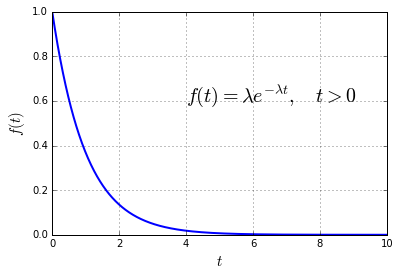

In [7]:
Lambda = 1
t_list = [0.01 * i for i in range(1000)]
ft = [Lambda * np.exp(-Lambda * t) for t in t_list]
plt.plot(t_list, ft,linewidth = 2)
plt.xlabel(r'$t$',fontsize = 15)
plt.ylabel(r'$f(t)$',fontsize = 15)
plt.text(4, 0.6, r'$f(t)=\lambda e^{-\lambda t}, \quad t>0$',fontsize = 20)
plt.grid()

我们可以这么理解：**泊松分布和负指数分布，是从两个角度，对同一个现象进行的描述。**

- 泊松分布关注的是单位时间内到达（或者离去）的顾客个数
- 负指数分布关注的是顾客到达（或者离去）的时间间隔

#### 爱尔朗分布

设$v_1,v_2,\cdots, v_k$是$k$个相互独立的随机变量，服从相同参数$k\lambda$的负指数分布，那么其求和后

$$
T = v_1 + v_2 + \cdots + v_k 
$$

的概率分布为

$$
f_{k}(t)=\frac{k \lambda(k \lambda t)^{k-1}}{(k-1) !} e^{-k \lambda t} \quad, \quad t \geq 0, \quad k \geq 0, \quad \lambda \geq 0
$$

上面的分布称为$k$阶爱尔朗分布。

Text(0, 0.5, '$f_k(t)$')

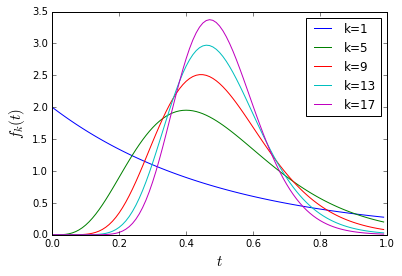

In [8]:
import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('classic')
%matplotlib inline 
def Erlang(t,Lambda,k):
    import numpy as np
    num = k*Lambda*(k*Lambda*t)**(k-1)* np.exp(-(k*Lambda*t))
    den = np.math.factorial(k-1) 
    return  num/den

Lambda = 2
for k in range(1,20,4):
    t_list = [0.01 * t for t in range(100)]
    f_list = [Erlang(t,Lambda,k) for t in t_list]
    plt.plot(t_list,f_list,label = 'k=' +  str(k))
    plt.legend()
plt.xlabel(r'$t$',fontsize = 15)
plt.ylabel(r"$f_k(t)$",fontsize = 15)

- 当$k=1$时，爱尔朗分布就是指数分布
- $k$增大时，图形逐渐变为对称的
- $k \geq 30$时，近似于正态分布

我们可以根据原始资料，由顾客到达的规律，对$\lambda$的经验分布进行估计。

在后续讨论中，我们主要讨论$\lambda$的概率分布为**负指数分布**的情况。

### 单服务台系统理论推导

标准$M/M/1$模型( $M/M/1/\infty/\infty$ )是排队模型中最简单的一个模型，它是指顾客的到达符合参数为$\lambda$的泊松分布，服务时间服从参数为$\mu$的负指数分布，服务台的个数为1，顾客源的数量为无限，系统的容量无限，顾客到达间隔时间和服务时间之间相互独立，排队规则是先到先服务。

服务时系统的状态转移图如下图








![状态转移图](https://cdn.kesci.com/upload/image/q2yhjoztyk.png?imageView2/0/w/960/h/960)



在负指数分布中可以假定

从 $[t, t+\Delta t]$ 内 $,$有一个顾客到达的概率为 $\lambda \Delta t+o(\Delta t),$有一个顾客离开的概率为 $\mu \Delta t+o(\Delta t)$，多于一个顾客达到或离开的概率为 $o(\Delta t)$ 。





在时刻 $[t, t+\Delta t]$时，$N(t+\Delta t)=n$的概率用状态转移来理解，可以表述为如下表达式：


$$
P_{n}(t+\Delta t)=P_{n-1}(t) *\left(\lambda \Delta t+o(\Delta t)\right)+P_{n+1}(t) \\
*\left(\mu \Delta t+o(\Delta t)\right)+P_{n}(t) *\left(\lambda \Delta t+o(\Delta t)\right) *\left(\mu \Delta t+o(\Delta t)\right)+P_{n}(t) *(1- \\
\left.\lambda \Delta t+o(\Delta t)\right) *\left(1-\mu \Delta t+o(\Delta t)\right)
$$

整理后得到

$$
P_{n}(t+\Delta t)-P_{n}(t)=\left[P_{n-1}(t) * \lambda +P_{n+1}(t) * \mu-P_{n}(t) * \lambda -\right. \\
\left.\left.P_{n}(t) * \mu \right] \Delta t+o(\Delta t)\right)
$$


对于整个系统，在系统稳定时，列状态平衡方程为

$$
\left\{\begin{array}{l}
{\lambda P_{0}=\mu P_{1}} \\
{\lambda P_{n-1}+\mu P_{n+1}=\lambda P_{n}+\mu P_{n}(n \geq 1)}
\end{array}\right.
$$

其中，

- $P_i$:系统中排队长度为$i$的概率
- $\lambda$:顾客到达速率
- $\mu$:服务速率

因为所有可能的状态概率求和为1

$$
\sum_{n=0}^{\infty} P_{n}=1
$$

结合幂级数展开

$$
\frac{1}{1-\rho} = 1+\rho+\rho^2+\rho^3 + \cdots+\rho^n (\rho<1)
$$


可以得到

$$
\begin{aligned}
&P_{0}=1-\rho\\
&\mathrm{P}_{\mathrm{n}}=(1-\rho) \rho^{n}, \quad n \geq 1
\end{aligned}
$$

其中

$$
\rho=\frac{\lambda}{\mu}
$$
为单位时间顾客平均到达率与平均服务率的比值，反映了服务机构的忙碌或利用的程度。

系统中顾客(包括排队等待和正在接受服务的)的数目定义为平均队长$L_s$

$$
\begin{aligned}
L_{s} &=\sum_{n=0}^{\infty} n P_{n}=\sum_{n=1}^{\infty} n(1-\rho) \rho^{n} \\
&=\left(\rho+2 \rho^{2}+3 \rho^{3}+\cdots\right)-\left(\rho^{2}+2 \rho^{3}+3 \rho^{4}+\cdots\right) \\
&=\rho+\rho^{2}+\rho^{3}+\cdots \\
&=\frac{\rho}{1-\rho}=\frac{\lambda}{\mu-\lambda}, 0<\rho<1
\end{aligned}
$$

在队列中排队等待的顾客数定义为平均排队长

$$
\begin{aligned}
L_{q} &=\sum_{n=1}^{\infty}(n-1) P_{n}=\sum_{n=1}^{\infty} n P_{n}-\sum_{n=1}^{\infty} P_{n}=L_{s}-\rho \\
&=\frac{\rho^{2}}{(1-\rho)}=\frac{\rho \lambda}{\mu-\lambda}=\frac{\lambda^{2}}{\mu(\mu-\lambda)}
\end{aligned}
$$

正在预期接受服务的顾客数

$$
L=0 P_{0}+1\left(P_{1}+P_{2}+\ldots+P_{n}+\ldots\right)=1-P_{0}=1-(1-\rho)=\rho
$$

我们可以验证

$$
L_{s}=L_{q}+L
$$

其他指标的计算方法为
从顾客到达时刻算起到他接受服务完毕为止所需要的时间，即是顾客在系统中所花费的总时间定义为平均逗留时间 

$$
W_s = \dfrac{L_s}{\lambda}
$$

从顾客到达时间算起到他开始接受服务时止的这段时间定义为平均等待时间

$$
W_q = \dfrac{L_q}{\lambda}
$$

每个顾客的平均服务时间为$d\dfrac{1}{\mu}$,因此

$$
W_s = W_q + \dfrac{1}{\mu}
$$

```{admonition} $M/M/1$模型计算案例
已知顾客到达快餐定的频率为平均6分钟一个人，服务员对顾客的平均服务时间为4分钟一个人，到达时间和服务时间都服从负指数分布。请回答以下问题
1. 服务员空闲的概率
2. 排队等待服务员服务的平均顾客数
3. 顾客在快餐店的平均逗留时间
4. 服务员平均每小时将为多少顾客提供服务
```

根据题意，该模型是标准的$M/M/1$模型

$$
\lambda = 10 人/小时, \mu = 15人/小时, \rho = \dfrac{2}{3}
$$

(1)

$$
P_{0}=1-\rho=1-\frac{2}{3}=\frac{1}{3}
$$
(2)

$$
L_{q}=\frac{\rho 2}{1-\rho}=\frac{\left(\frac{2}{3}\right)^{2}}{1-\frac{2}{3}}=\frac{4}{3}(人)
$$

(3)

$$
L_{s}=\frac{\rho}{1-\rho}=\frac{\frac{2}{3}}{1-\frac{2}{3}}=2 (人)
$$

$$
W_{s}=\frac{L_{s}}{\lambda}=\frac{2}{10}=\frac{1}{5} (小时) = 12 （分钟）
$$
(4) 如果服务员一直繁忙，平均每小时服务15人，由(1)知，其繁忙率为$\dfrac{2}{3}$，因此平均每小时服务10人。

### 多服务台系统理论推导

标准$M/M/c$模型( $M/M/c/\infty/\infty$ )是指顾客的到达符合参数为$\lambda$的泊松分布，服务时间服从参数为$\mu$的负指数分布，服务台的个数为$c$，顾客源的数量为无限，系统的容量无限，顾客到达间隔时间和服务时间之间相互独立，排队规则是先到先服务。其生灭过程如下图所示

![Image Name](https://cdn.kesci.com/upload/image/q30r1rz097.png?imageView2/0/w/960/h/960)

状态平衡方程

$$
{\lambda P_{0}=\mu P_{1}} 
$$

$$
\lambda P_{n-1}+(n+1) \mu P_{n+1}=(\lambda+n \mu) P_{n},( 1 \leq n < c )
$$

$$
{c \mu P_{n+1}+\lambda P_{n-1}=(\lambda+c \mu) P_{n}, (n \geq c)}
$$

得到每个状态的概率为（具体推导过程略）

$$
P_{0}=\left[\sum_{k=0}^{c-1} \frac{1}{k !}\left(\frac{\lambda}{\mu}\right)^{k}+\frac{1}{c !} \frac{1}{1-\rho}\left(\frac{\lambda}{\mu}\right)^{c}\right]^{-1}
$$


$$
P_{n}={\dfrac{1}{n !}\left(\dfrac{\lambda}{\mu}\right)^{n} P_{0},(n < c)} 
$$

$$
P_{n}= {\dfrac{1}{c ! c^{n-c}}\left(\dfrac{\lambda}{\mu}\right)^{n} P_{0},(n \geq c)}
$$

其中

$$
\rho = \frac{\lambda}{c\mu}
$$

其他指标：

平均排队长

$$
L_q=\sum_{n=c+1}^{\infty}(n-c) P_{n}=\frac{(c \rho)^{c} \rho}{c !(1-\rho)^{2}} P_{0}
$$

平均队长

$$
L_{s}=L_{q}+\frac{\lambda}{\mu}
$$


平均逗留时间

$$
W_{s}=\frac{L_{s}}{\lambda}
$$

平均等待时间

$$
W_{q}=\frac{L_{q}}{\lambda}
$$

```{admonition} $M/M/c$模型计算案例
某银行有三个出纳员，顾客的到达服从泊松分布，平均每小时达到30人，顾客排成一队。出纳员对顾客的服务时间服从负指数分布，平均每小时可以服务12人。试求
1. 三名出纳员都忙的概率以及该银行的主要运行指标
2. 若所有的顾客都排成三队，顾客平均每小时到达10人，计算该银行的主要运行指标。
3. 对比以上两个指标，你能得到什么结论？
```

**解**：

(1) 根据题意，这是标准的$M/M/c$模型，$c=3$
$\lambda = 30（人/小时）， \mu = 12 （人/小时）, \dfrac{\lambda}{\mu} =\dfrac{5}{2}, \rho = \dfrac{\lambda}{c\mu} = \dfrac{5}{6}$
则有，

$$
P_{0}=\left[\frac{\left(\frac{5}{2}\right)^{0}}{0 !}+\frac{\left(\frac{5}{2}\right)^{1}}{1 !}+\frac{\left(\frac{5}{2}\right)^{2}}{2 !}+\frac{\left(\frac{5}{2}\right)^{3}}{3 !} \times \frac{1}{1-\frac{5}{6}}\right]^{-1}=0.0449
$$


$$
P(n \geq 3)=\frac{\left(\frac{5}{2}\right)^{3}}{3 !} \times 0.0449=0.117
$$

$$
L_{q}=\frac{\left(\frac{5}{2}\right)^{3} \times \frac{5}{6}}{6 \times\left(1-\frac{5}{6}\right)} \times 0.0449=3.51
$$

$$
L_{s}=L_{q}+\frac{\lambda}{\mu}=3.51+2.5=6.01
$$

$$
W_{s}=\frac{L_{s}}{\lambda}=\frac{6.01}{30}=0.2
$$

$$
W_{q}=\frac{L_{q}}{\lambda}=\frac{3.51}{30}=0.12
$$

(2) 该模型为三个标准的$M/M/1$模型

$\lambda = 10（人/小时）， \mu = 12 （人/小时）,  \rho = \dfrac{\lambda}{\mu} = \dfrac{5}{6}$

则有，

$$
P_{0}=1-\rho=\frac{1}{6} \quad P(n \geq 1)=1-P_{0}=\frac{5}{6}
$$

$$
L_{s}=\frac{\lambda}{\mu-\lambda}=\frac{10}{12-10}=5
$$

$$
L_{q}=L_{s}-\rho=\frac{25}{6}=4.17
$$

$$
W_{s}=\frac{L_{s}}{\lambda}=\frac{5}{10}=0.5
$$

$$
W_{q}=W_{s}-\frac{1}{\mu}=0.5-\frac{1}{12}=0.417
$$

(3) 比较前两问的结果，不难发现。单队列的排队系统比多队列的排队系统空闲概率低，而且单队列排队长度也比多队列长，逗留时间和等待时间也都比多队列长。可见，排队方式对排队系统的运行指标影响还是很大的。

## 使用蒙特卡洛方法模拟排队系统

In [9]:
def MM1(Lambda,mu):
    return Lambda**2/(mu*(mu-Lambda))

In [10]:
lambda1 = 1
size = 100
t1 = np.random.exponential(1/lambda1, size=size)
t1

array([3.10212935e-02, 3.43839234e-02, 1.29425173e-02, 2.01574293e+00,
       3.95923649e-01, 3.22628334e+00, 1.70463916e+00, 4.25268837e+00,
       4.55862480e-01, 4.31614420e-01, 1.42269905e+00, 5.73886243e-01,
       2.06740966e-01, 4.75452345e-01, 5.22357603e+00, 6.39296630e-02,
       6.46127855e-01, 3.31902899e-01, 6.98067147e-01, 1.16354280e+00,
       1.04606194e+00, 8.64788050e-01, 7.03505707e-01, 8.98148161e-01,
       2.58326490e-01, 4.69089519e-03, 5.12110382e-01, 2.42954509e+00,
       1.99818737e+00, 9.34847305e-01, 1.15755473e+00, 1.14478155e+00,
       1.46014726e+00, 2.35911260e-01, 1.53193837e+00, 1.76439019e+00,
       2.37476992e-01, 1.03869171e+00, 2.11131490e+00, 2.14333449e+00,
       2.80335931e+00, 8.56025764e-01, 8.24063105e-02, 2.28144937e+00,
       6.11857097e-02, 6.17268493e-01, 3.03412026e-02, 3.24593257e-01,
       1.91594459e+00, 2.12231848e+00, 1.76803533e+00, 3.72430193e-01,
       5.73168975e-02, 2.25615938e-01, 1.83498365e+00, 4.78744373e+00,
      

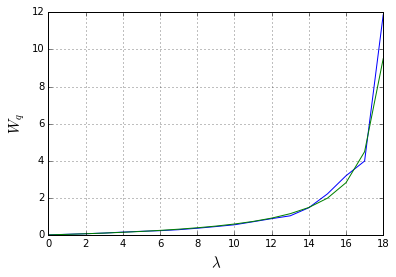

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(4)
lambda1 = 1.5
mu1 = 2
lambdalist = [0.1 * i for i in range(1,20)]
MC = []
QC = []
for lambda1 in lambdalist:
    size = 10000
    t1 = np.random.exponential(1/lambda1, size=size)
    t2 = np.random.exponential(1/mu1, size=size)
    
    ArrTime = [0]
    LeaveTime = []
    WaitingTime = []
    
    # 累计到达时间
    for t in t1:
        ArrTime.append(ArrTime[-1] + t)
        
    
    ## 对于第一个顾客来说，可以直接接受服务,不需要等待
    LeaveTime.append(t2[0])
    WaitingTime.append(0)
    for i in range(1,size):
        # 更新到达时刻空闲队伍的个数
        CurrentTime = ArrTime[i]
        if CurrentTime > LeaveTime[i-1]:
            WaitingTime.append(0)
            LeaveTime.append(CurrentTime+t2[i])
        else:
            WaitingTime.append(LeaveTime[i-1] - CurrentTime)
            LeaveTime.append(LeaveTime[i-1] + t2[i])
    MC.append(np.mean(WaitingTime))
    QC.append(MM1(lambda1,mu1)/lambda1)
plt.plot(MC)
plt.plot(QC)
plt.xlabel(r'$\lambda$',fontsize = 15)
plt.ylabel(r'$W_q$',fontsize = 15)
plt.grid()

**结合蒙特卡洛模拟，可以避开繁杂的理论推导，直观且容易编程。**

## 作业

```{admonition} 作业

- 某医院手术室根据病人来诊和完成手术时间的记录，经统计分析算出每小时病人平均 到达率为 2.1 人/h，为泊松分布。每次手术平均时间 0.4h/人，即平均服务率是 2.5 人/h，服从负指数分布。求:
  - (1)病房中病人的平均数($L$)。
  - (2)排队等待手术病人的平均数( $\left.L_{q}\right)$
  - (3)病人在病房中平均逗留时间($W$)。
  - (4)病人排队等待时间(期望值队 $\left.W_{q}\right)$
- 到达某铁路售票处顾客分两类：一类买南方线路票，到达率为$\lambda_1$/小时，另一类买北方线路票，到达率为$\lambda_2$/小时，以上均服从泊松分布。该售票处设两个窗口，各窗口服务一名顾客时间均服从参数$\mu=10$的指数分布。试比较下列情况时顾客分别等待时间 ：
  - 两个窗口分别售南方票和北方票；
  - 每个窗口两种票均出售。（分别比较 $\lambda_1 = \lambda_2 = 2,4,6,8,10$时的情形）
```